In [0]:
# Recurrent Neural Network
# Predicting Google Stock Prices
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
dataset_train = pd.read_csv('/content/gdrive/My Drive/Google_Stock_Price_Train.csv')

In [8]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
training_set = dataset_train.iloc[:,1:2].values # For getting numpy array of 'Open' column,we are using 1:2 since anyway upper bound is excluded

In [0]:
#Feature Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1)) # To make sure the scaled range between 0 and 1
training_set_scaled = sc.fit_transform(training_set)


In [0]:
# Creating a data structure with 60 timesteps and 1 output[indirectly we are using 3 months data to predict stock price]


In [0]:
X_train = []
y_train = []
# start from 60 to length of the dataset
for i in  range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)  
  

In [13]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [0]:
# Reshaping the data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1)) # Check keras.io, 3Dimension code syntax


In [0]:
# Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initializing the RNN
regressor = Sequential() # Here we wanna predict stock values which is continuous, so we are declaring variable as regressor

In [0]:
# Adding the First LSTM layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2)) # 20% dropout Regularization

In [0]:
# Adding a Second LSTM layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a Third LSTM layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a Fourth LSTM layer and some Dropout Regularization
regressor.add(LSTM(units = 50)) # Here we are not returing anything so removing the parameter return_sequences=True
regressor.add(Dropout(0.2))

In [0]:
# Adding the output layer
regressor.add(Dense(units=1))

In [0]:
# Compiling the RNN
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error') # As we are prediction continuous value, so loss function is MSE here

In [23]:
# Fitting RNN to the training set
regressor.fit(X_train,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0381
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - l

In [0]:
# Making the predictions and visalizing the dataset

#Getting the real stock price of 2017 from test dataset
dataset_test = pd.read_csv('/content/gdrive/My Drive/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [0]:
# Getting the predicted stock price of 2017
# Here we did analysis till now with 60 days of  past data used to predict 61th day stock price.
#So even in test set also we need past data to predict. So concatenate train and test datasets
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis =0 )
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [0]:
X_test = []
for i in range(60,80): #we are considering from 60 and test set having 20 observations. So 60+20 = 80
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test) 
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

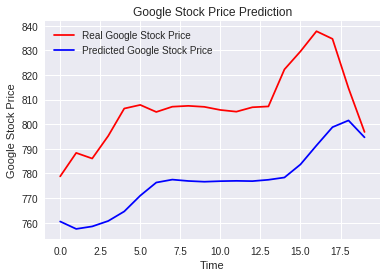

In [28]:
# Visualising the results
plt.plot(real_stock_price,color ='red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,color = 'blue',label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
